In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def imShow(image, colorMap = 'gray'):
    plt.imshow(image, cmap = colorMap)

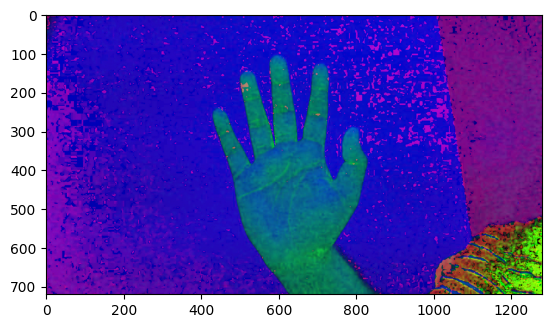

In [3]:
image = cv2.imread("hand.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(image)

In [ ]:
img = image
blur = cv2.GaussianBlur(img, (7, 7), 0)
imShow(blur)

In [ ]:
mask = cv2.inRange(img, np.array([1, 20, 10]), np.array([20, 255, 255]))
kernel = np.ones((5, 5))
dilate = cv2.dilate(mask, kernel, iterations = 1)
erosion = cv2.erode(dilate, kernel, iterations = 1)

In [ ]:
imShow(mask)

In [ ]:
imShow(dilate)

In [ ]:
imShow(erosion)

In [ ]:
blur = cv2.GaussianBlur(erosion, (5, 5), 0)
ret, thresh = cv2.threshold(blur, 127, 255, 0)
imShow(thresh)

In [ ]:
contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
contour = max(contours, key=lambda x: cv2.contourArea(x))

In [ ]:
x, y, w, h = cv2.boundingRect(contour)
cv2.rectangle(image, (x, y), (x + w, y + h), (200, 160, 150), 2)

org_image = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)
plt.imshow(org_image)

In [ ]:
hull = cv2.convexHull(contour, returnPoints = True)
cv2.drawContours(img, [hull], -1, (255, 10, 2), 2)
imShow(img)

In [ ]:
hull2 = cv2.convexHull(contour, returnPoints = False)
defects = cv2.convexityDefects(contour, hull2)
defects.shape

In [ ]:
print(contour.shape)

In [ ]:
def Dist(a, b):
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

4


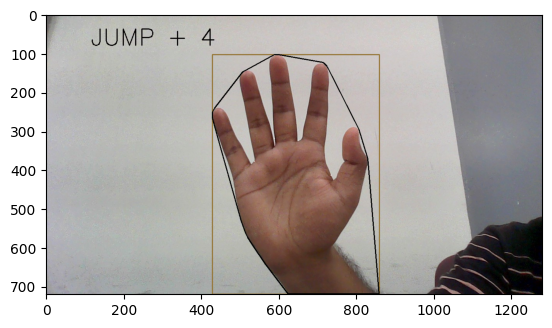

In [49]:
pi = 3.14
count_defects = 0

for i in range(defects.shape[0]):
    s, e, f, d = defects[i][0]
    start = tuple(contour[s][0])
    end = tuple(contour[e][0])
    far = tuple(contour[f][0])

    a = Dist(start, end)
    b = Dist(start, far)
    c = Dist(end, far)

    angle = np.arccos((b**2 + c**2 - a**2) / (2 * b * c)) * 180 / pi

    if angle <= 90:
        count_defects += 1
        cv2.circle(img, far, 1, [0, 0, 255], -1)
    cv2.line(img, start, end, [0, 255, 0], 2)

ret_im = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
cv2.putText(ret_im, "JUMP + {}".format(count_defects), (115, 80), cv2.FONT_HERSHEY_SIMPLEX, 2, 2, 2)
imShow(ret_im)
print(count_defects)

In [51]:
def Dist(a, b):
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    img = frame

    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(img, np.array([1, 20, 10]), np.array([20, 255, 255]))
    
    kernel = np.ones((5, 5))
    dilate = cv2.dilate(mask, kernel, iterations = 1)
    erosion = cv2.erode(dilate, kernel, iterations = 1)
    
    blur = cv2.GaussianBlur(erosion, (5, 5), 0)
    ret, thresh = cv2.threshold(blur, 127, 255, 0)
    
    contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contour = max(contours, key=lambda x: cv2.contourArea(x))
    x, y, w, h = cv2.boundingRect(contour)
    
    img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)

    hull = cv2.convexHull(contour, returnPoints = True)
    cv2.drawContours(frame, [hull], -1, (2, 10, 255), 2)

    hull2 = cv2.convexHull(contour, returnPoints = False)
    defects = cv2.convexityDefects(contour, hull2)
    defects.shape

    pi = 3.14
    count_defects = 0
    
    for i in range(defects.shape[0]):
        s, e, f, d = defects[i][0]
        start = tuple(contour[s][0])
        end = tuple(contour[e][0])
        far = tuple(contour[f][0])
    
        a = Dist(start, end)
        b = Dist(start, far)
        c = Dist(end, far)
    
        angle = np.arccos((b**2 + c**2 - a**2) / (2 * b * c)) * 180 / pi
    
        if angle <= 90:
            count_defects += 1
            cv2.circle(frame, far, 1, [0, 0, 255], -1)
        cv2.line(frame, start, end, [0, 255, 0], 2)
    
    # ret_im = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    cv2.putText(frame, "Defects = {}".format(count_defects), (115, 80), cv2.FONT_HERSHEY_SIMPLEX, 2, 2, 2)
    
    cv2.rectangle(frame, (x, y), (x + w, y + h), (200, 10, 0), 2)
    cv2.imshow("Video Stream", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break

cap.release()
cv2.destroyAllWindow()

AttributeError: module 'cv2' has no attribute 'destroyAllWindow'